### Create a SQL DB from a series of processed CSV files via SQLAlchemy.

The processed CSV files were imported from the WHO, UN, OECD, World Bank, loaded, processed and exported via Pandas


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create a list (array) with the names of the CSV files from the processed data location

In [2]:
datapath = os.path.join(os.getcwd(), "data2")

if os.path.isdir(datapath):
    datafiles = [f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]

For these files, split the extension, capitalize and append them to a dictionary which will contain as key the name minus extension and as value the Pandas DataFrame

In [3]:
datadict = dict()

for f in datafiles:
    #print(f)
    datadict[((f.rsplit(".", 1)[0]).capitalize())] = pd.read_csv(os.path.join(datapath, f), index_col = "Country")

In [4]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [5]:
# find for each DB, the unique country/index entries
# which we convert to lists and then sets to find the
# intersection of the lists/sets

uniqndx = []

for key, val in datadict.items():
    uniqndx.append(list(datadict[key].index.unique()))


In [6]:
#inter = [i for i in uniqndx[0]]
countries = []

for i, val in enumerate(uniqndx):
    countries = list(set(countries).intersection(set(uniqndx[i]))) \
        if i != 0 else [i for i in uniqndx[0]]

In [7]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [8]:
df = pd.DataFrame()

### Check for NaNs

we're going to have NaNs since multiple dataframes span different time ranges. Since we do an union of the dataframes we're guaranteed to have some fields/columns without data depending on the year.
If there are any *Code* fields left with NaN, fill to *NUL*. For everything else fill them with 0.


In [9]:
for key, val in datadict.items():
    print(key)
    datadict[key].drop(columns=["Code"], inplace = True)

Anual_number_of_deaths_by_cause
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [10]:
df = pd.merge(left=datadict["Anual_number_of_deaths_by_cause"], right=datadict["Average_total_years_of_schooling_for_adult_population"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Life_satisfaction_in_cantril_ladder_world_happiness_report_2021"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Life_expectancy"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Life_expectancy_at_birth"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Human_development_index"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Mortality_rate_under_5_per_1000_live_births"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Suicide_mortality_rate_per_100000_population"], how="outer", on=["Year", "Country"])

df = pd.merge(left=df, right=datadict["Annual_co2_emissions"], how="outer", on=["Year", "Country"])

df.head()

,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,Deaths_-_chronic_kidney_disease,...,Life_satisfaction_in_Cantril_Ladder_(World_Happiness_Report_2021),Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,3155.356340,...,NaN,50.331,50.331,0.0,50.331,12412311.0,NaN,17.77,NaN,2603238.0
Afghanistan,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,3124.082631,...,NaN,50.999,50.999,0.0,50.999,13299016.0,NaN,17.17,NaN,2427366.0
Afghanistan,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,3192.278428,...,NaN,51.641,51.641,0.0,51.641,14485543.0,NaN,16.59,NaN,1379462.0
Afghanistan,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,3343.974014,...,NaN,52.256,52.256,0.0,52.256,15816601.0,NaN,16.04,NaN,1333055.0
Afghanistan,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,3480.299710,...,NaN,52.842,52.842,0.0,52.842,17075728.0,NaN,15.52,NaN,1281602.0


In [11]:
#df.dropna(inplace = True)

In [12]:
df.columns

Index(['Year', 'Number_of_executions_(amnesty_international)',
       'Deaths_-_meningitis', 'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_exposure

In [13]:
df.rename(columns={"Number_of_executions_(amnesty_international)" : "Number_of_executions", "Life_satisfaction_in_Cantril_Ladder_(World_Happiness_Report_2021)" : "Life_satisfaction", "$1.90_per_day_-_share_of_population_below_poverty_line" : "Share_of_population_below_poverty_line_2USD_per_day", "Total_population_(Gapminder,_HYDE_&_UN)" : "Total_population"}, inplace=True)

In [14]:
df.drop(columns={"Number_of_executions"}, inplace=True)
df.columns

Index(['Year', 'Deaths_-_meningitis', 'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_exposure_to_forces_of_nature', 'Deaths_-_diarrheal_diseases',
 

In [15]:
df.columns = df.columns.str.replace("_-_", "_")

In [16]:
df.columns

Index(['Year', 'Deaths_meningitis', 'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein-energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_fire,_heat,_and_hot_substances',
       'Deaths_malaria', 'Deaths_drowning', 'Deaths_interpersonal_violence',
       'Deaths_hiv/aids', 'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       'Deaths_nutri

In [17]:
df.rename(columns={"Deaths_hiv/aids" : "Deaths_aids"}, inplace = True)

In [18]:
df.columns = df.columns.str.replace("-","_")

In [19]:
df.rename(columns={"Life_expectancy_at_birth,_total_(years)" : "Total_life_expectancy_at_birth_in_years"}, inplace = True)

In [20]:
df.rename(columns={"Deaths_protein-energy_malnutrition" : "Deaths_protein_energy_malnutrition"}, inplace = True)

In [21]:
df.rename(columns={"Deaths_fire,_heat,_and_hot_substances" : "Deaths_by_fire_and_heat"}, inplace=True)

In [22]:
df.columns

Index(['Year', 'Deaths_meningitis', 'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein_energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_by_fire_and_heat', 'Deaths_malaria',
       'Deaths_drowning', 'Deaths_interpersonal_violence', 'Deaths_aids',
       'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       'Deaths_nutritional_deficiencie

In [23]:
df.drop(columns="Unnamed: 0", inplace = True)

In [24]:
df.columns

Index(['Year', 'Deaths_meningitis', 'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein_energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_by_fire_and_heat', 'Deaths_malaria',
       'Deaths_drowning', 'Deaths_interpersonal_violence', 'Deaths_aids',
       'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       'Deaths_nutritional_deficiencie

In [25]:
df[df.isna().any(axis=1)]

,Year,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,Deaths_chronic_respiratory_diseases,...,Life_satisfaction,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1990,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,3155.356340,5954.958582,...,NaN,50.331,50.331,0.0,50.331,12412311.0,NaN,17.77,NaN,2.603238e+06
Afghanistan,1991,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,3124.082631,6023.386323,...,NaN,50.999,50.999,0.0,50.999,13299016.0,NaN,17.17,NaN,2.427366e+06
Afghanistan,1992,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,3192.278428,6217.245157,...,NaN,51.641,51.641,0.0,51.641,14485543.0,NaN,16.59,NaN,1.379462e+06
Afghanistan,1993,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,3343.974014,6468.245470,...,NaN,52.256,52.256,0.0,52.256,15816601.0,NaN,16.04,NaN,1.333055e+06
Afghanistan,1994,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,3480.299710,6678.495850,...,NaN,52.842,52.842,0.0,52.842,17075728.0,NaN,15.52,NaN,1.281602e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485281e+09
World,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.533711e+09
World,1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.606311e+09


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37791 entries, Afghanistan to World
Data columns (total 45 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Year                                                   37791 non-null  int64  
 1   Deaths_meningitis                                      6686 non-null   float64
 2   Deaths_lower_respiratory_infections                    6686 non-null   float64
 3   Deaths_intestinal_infectious_diseases                  6686 non-null   float64
 4   Deaths_protein_energy_malnutrition                     6686 non-null   float64
 5   Terrorism                                              6686 non-null   float64
 6   Deaths_cardiovascular_diseases                         6686 non-null   float64
 7   Deaths_alzheimer_disease_and_other_dementias           6686 non-null   float64
 8   Deaths_chronic_kidney_disease            

In [32]:
df["Year"]
df.dropna(inplace = True)

In [33]:
df.dtypes

Year                                                       int64
Deaths_meningitis                                        float64
Deaths_lower_respiratory_infections                      float64
Deaths_intestinal_infectious_diseases                    float64
Deaths_protein_energy_malnutrition                       float64
Terrorism                                                float64
Deaths_cardiovascular_diseases                           float64
Deaths_alzheimer_disease_and_other_dementias             float64
Deaths_chronic_kidney_disease                            float64
Deaths_chronic_respiratory_diseases                      float64
Deaths_cirrhosis_and_other_chronic_liver_diseases        float64
Deaths_digestive_diseases                                float64
Deaths_hepatitis                                         float64
Deaths_neoplasms                                         float64
Deaths_parkinson_disease                                 float64
Deaths_by_fire_and_heat  

In [34]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///deadline_database_nonans.db", echo=True)
sqlite_connection = engine.connect()

In [35]:
sqlite_table = "Deadline_database"

df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-05 12:28:05,182 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-05 12:28:05,183 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-05 12:28:05,185 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Deadline_database")
2021-12-05 12:28:05,185 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-05 12:28:05,187 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Deadline_database" (
	"Country" TEXT, 
	"Year" BIGINT, 
	"Deaths_meningitis" FLOAT, 
	"Deaths_lower_respiratory_infections" FLOAT, 
	"Deaths_intestinal_infectious_diseases" FLOAT, 
	"Deaths_protein_energy_malnutrition" FLOAT, 
	"Terrorism" FLOAT, 
	"Deaths_cardiovascular_diseases" FLOAT, 
	"Deaths_alzheimer_disease_and_other_dementias" FLOAT, 
	"Deaths_chronic_kidney_disease" FLOAT, 
	"Deaths_chronic_respiratory_diseases" FLOAT, 
	"Deaths_cirrhosis_and_other_chronic_liver_diseases" FLOAT, 
	"Deaths_digestive_diseases" FLOAT, 
	"Deaths_hepatitis" FLOAT, 
	"Deaths_neoplasms" FLOAT, 
	"Deaths_park

In [36]:
# close connection to DB
sqlite_connection.close()

<AxesSubplot:title={'center':'Portugal meningitis deaths from 1990 to 2018'}, xlabel='Year'>

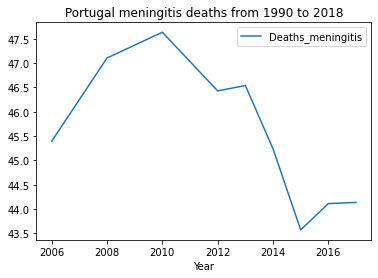

In [37]:
df.loc["Portugal"].plot(x="Year", y="Deaths_meningitis", title="Portugal meningitis deaths from 1990 to 2018")

<AxesSubplot:title={'center':'Portugal meningitis deaths from 1990 to 2018'}, xlabel='Year'>

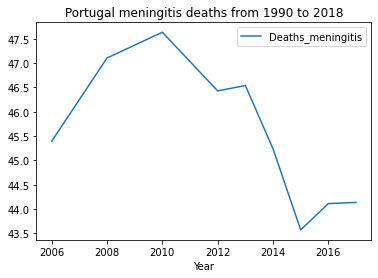

In [38]:
df.loc["Portugal"].plot(x="Year", y="Deaths_meningitis", title="Portugal meningitis deaths from 1990 to 2018")

In [39]:
df.columns

Index(['Year', 'Deaths_meningitis', 'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein_energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_by_fire_and_heat', 'Deaths_malaria',
       'Deaths_drowning', 'Deaths_interpersonal_violence', 'Deaths_aids',
       'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       'Deaths_nutritional_deficiencie

<AxesSubplot:title={'center':'Number of people below poverty line, with 2USD/day'}, xlabel='Year'>

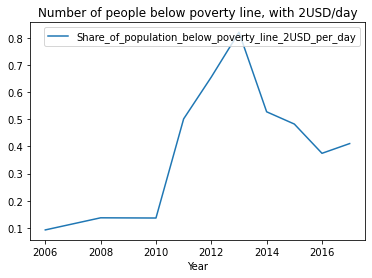

In [40]:
df.loc["Portugal"].plot(x="Year", y="Share_of_population_below_poverty_line_2USD_per_day", title="Number of people below poverty line, with 2USD/day")

<AxesSubplot:title={'center':'Annual CO2 emissions'}, xlabel='Year'>

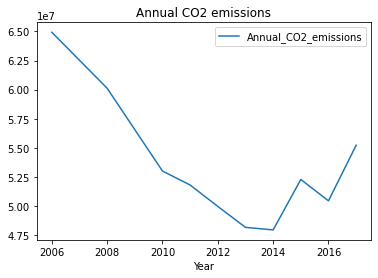

In [41]:
df.loc["Portugal"].plot(x="Year", y="Annual_CO2_emissions", title="Annual CO2 emissions")

<AxesSubplot:title={'center':'Life satisfaction index'}, xlabel='Year'>

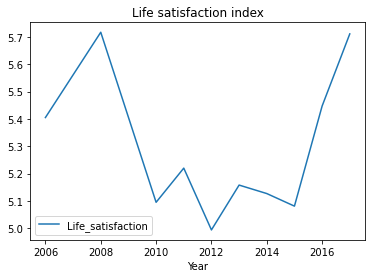

In [42]:
df.loc["Portugal"].plot(x="Year", y="Life_satisfaction", title="Life satisfaction index")

<AxesSubplot:title={'center':'Life expectancy at birth'}, xlabel='Year'>

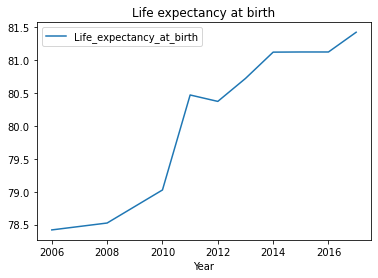

In [43]:
df.loc["Portugal"].plot(x="Year", y="Life_expectancy_at_birth", title="Life expectancy at birth")

<AxesSubplot:title={'center':'Suicide mortality rate per 100k inhabitants'}, xlabel='Year'>

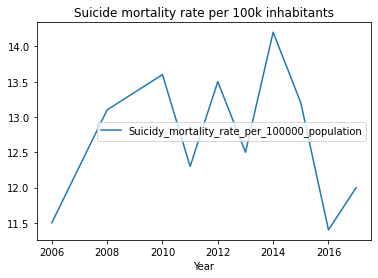

In [44]:
df.loc["Portugal"].plot(x="Year", y="Suicidy_mortality_rate_per_100000_population", title="Suicide mortality rate per 100k inhabitants")

<AxesSubplot:title={'center':'Suicide mortality rate per 100k inhabitants'}, xlabel='Year'>

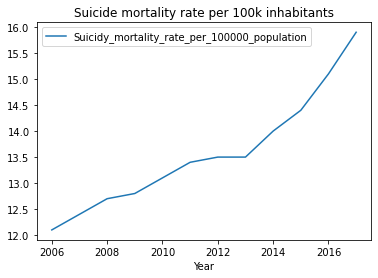

In [45]:
df.loc["United States"].plot(x="Year", y="Suicidy_mortality_rate_per_100000_population", title="Suicide mortality rate per 100k inhabitants")

<AxesSubplot:title={'center':'Avg total year of schooling'}, xlabel='Year'>

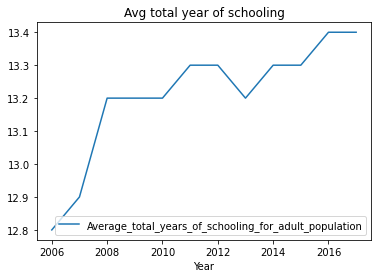

In [46]:
df.loc["United States"].plot(x="Year", y="Average_total_years_of_schooling_for_adult_population", title="Avg total year of schooling")

<AxesSubplot:title={'center':'Deaths by alcohol related disorders'}, xlabel='Year'>

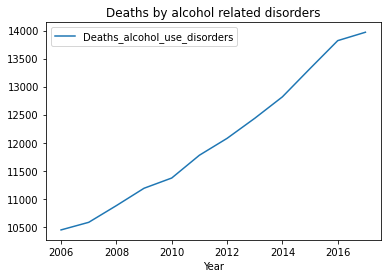

In [47]:
df.loc["United States"].plot(x="Year", y="Deaths_alcohol_use_disorders", title="Deaths by alcohol related disorders")

In [48]:
import matplotlib.pyplot as plt
import numpy as np

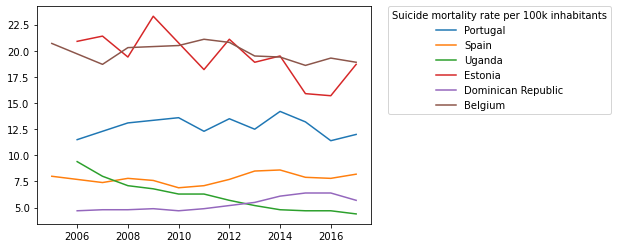

In [49]:
fig, ax = plt.subplots()
lines = ax.plot(df.loc["Portugal"]["Year"], df.loc["Portugal"]["Suicidy_mortality_rate_per_100000_population"], label="Portugal")

lines = ax.plot(df.loc["Spain"]["Year"], df.loc["Spain"]["Suicidy_mortality_rate_per_100000_population"], label="Spain")

lines = ax.plot(df.loc["Uganda"]["Year"], df.loc["Uganda"]["Suicidy_mortality_rate_per_100000_population"], label="Uganda")

lines = ax.plot(df.loc["Estonia"]["Year"], df.loc["Estonia"]["Suicidy_mortality_rate_per_100000_population"], label="Estonia")

lines = ax.plot(df.loc["Dominican Republic"]["Year"], df.loc["Dominican Republic"]["Suicidy_mortality_rate_per_100000_population"], label="Dominican Republic")

lines = ax.plot(df.loc["Belgium"]["Year"], df.loc["Belgium"]["Suicidy_mortality_rate_per_100000_population"], label="Belgium")


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Suicide mortality rate per 100k inhabitants")

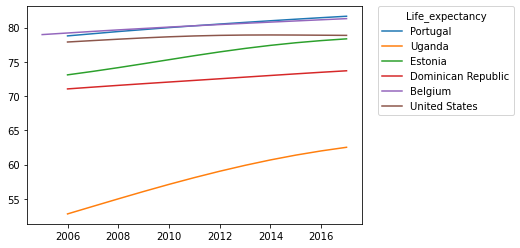

In [50]:
fig, ax = plt.subplots()
lines = ax.plot(df.loc["Portugal"]["Year"], df.loc["Portugal"]["Life_expectancy"], label="Portugal")

lines = ax.plot(df.loc["Uganda"]["Year"], df.loc["Uganda"]["Life_expectancy"], label="Uganda")

lines = ax.plot(df.loc["Estonia"]["Year"], df.loc["Estonia"]["Life_expectancy"], label="Estonia")

lines = ax.plot(df.loc["Dominican Republic"]["Year"], df.loc["Dominican Republic"]["Life_expectancy"], label="Dominican Republic")

lines = ax.plot(df.loc["Belgium"]["Year"], df.loc["Belgium"]["Life_expectancy"], label="Belgium")

lines = ax.plot(df.loc["United States"]["Year"], df.loc["United States"]["Life_expectancy"], label="United States")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Life_expectancy")

In [51]:
df.loc["India"]

,Year,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,Deaths_chronic_respiratory_diseases,...,Life_satisfaction,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions
Country,,,,,,,,,,,,,,,,,,,,,
India,2006,75085.600667,583751.546021,102208.357469,52144.534167,722.0,1.734072e+06,97910.373783,159411.408952,9.341500e+05,...,5.348,64.918,64.918,37.82878,64.918,1.165486e+09,0.545,7.12,15.6,1.259744e+09
India,2007,72729.886958,578128.063102,99578.728776,49871.051677,626.0,1.818917e+06,102722.306413,164746.889441,9.637694e+05,...,5.027,65.350,65.350,35.99437,65.350,1.183209e+09,0.556,6.79,15.3,1.358152e+09
India,2008,71408.802421,574085.229668,96782.757931,47892.579392,824.0,1.909307e+06,108548.406355,171506.434749,9.931769e+05,...,5.146,65.794,65.794,34.82076,65.794,1.200670e+09,0.564,6.47,15.1,1.462815e+09
India,2009,70274.213131,566508.424120,94087.643929,45796.010618,774.0,1.996194e+06,116313.077721,176170.965408,1.023727e+06,...,4.522,66.244,66.244,33.74249,66.244,1.217726e+09,0.570,6.14,14.5,1.612817e+09
India,2010,69338.999047,563881.372396,91161.174045,44333.234062,812.0,2.095862e+06,124919.542475,182075.637079,1.056499e+06,...,4.989,66.693,66.693,29.73074,66.693,1.234281e+09,0.581,5.82,14.6,1.677888e+09
India,2011,68151.714484,565502.938961,90683.639376,41776.375272,499.0,2.197149e+06,131034.598254,189428.398774,1.081623e+06,...,4.635,67.130,67.130,23.57454,67.130,1.250288e+09,0.591,5.51,14.7,1.780130e+09
India,2012,65837.485037,561497.613739,89299.921135,39691.334840,264.0,2.285131e+06,135644.128679,194550.186456,1.094010e+06,...,4.720,67.545,67.545,21.68239,67.545,1.265780e+09,0.600,5.20,14.3,1.963586e+09
India,2013,63525.606668,555951.105342,88172.434223,36404.044868,467.0,2.351070e+06,141679.801684,201217.305295,1.125959e+06,...,4.428,67.931,67.931,19.08920,67.931,1.280842e+09,0.607,4.91,13.7,2.036937e+09
India,2014,58469.870486,540698.717851,86921.720566,32393.590166,490.0,2.418358e+06,151877.363314,206843.886596,1.162800e+06,...,4.424,68.286,68.286,16.99557,68.286,1.295601e+09,0.618,4.62,12.8,2.185856e+09


In [57]:
import pandas as pd
df2 = pd.read_sql_table("Deadline_database", "sqlite:///deadline_database_nonans.db", index_col = "Country")

In [58]:
df2.head()

,Year,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,Deaths_chronic_respiratory_diseases,...,Life_satisfaction,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,8387.057275,26623.480551,437.718960,1681.270324,1092.0,53402.322328,2496.968317,3685.769665,6855.287038,...,3.724,59.930,59.930,0.0,59.930,27722281.0,0.437,9.54,4.6,4199530.0
Afghanistan,2009,7318.273004,24792.335792,415.776634,1568.095029,1065.0,53024.450772,2537.090789,3661.267068,6778.040896,...,4.402,60.484,60.484,0.0,60.484,28394806.0,0.453,9.14,4.4,6739976.0
Afghanistan,2010,7154.319444,23950.017286,332.253781,1541.841155,1157.0,52712.687821,2575.132021,3682.828675,6734.345783,...,4.758,61.028,61.028,0.0,61.028,29185511.0,0.463,8.76,4.3,8397779.0
Afghanistan,2011,6919.757958,23115.144836,299.758258,1468.203744,1525.0,52815.737495,2615.883604,3691.336232,6708.237356,...,3.832,61.553,61.553,0.0,61.553,30117411.0,0.471,8.39,4.1,12105788.0
Afghanistan,2012,6631.942601,22155.754481,302.255411,1406.214788,3521.0,52961.704530,2657.841812,3673.818524,6680.079938,...,3.783,62.054,62.054,0.0,62.054,31161378.0,0.482,8.03,4.0,10218514.0


In [59]:
len(list(df2.index.unique()))

158

In [71]:
df.loc["Portugal"]["Year"] == 2011

Country
Portugal    False
Portugal    False
Portugal    False
Portugal     True
Portugal    False
Portugal    False
Portugal    False
Portugal    False
Portugal    False
Portugal    False
Name: Year, dtype: bool